In [1]:
# Importing used libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler


In [2]:
# Reading train and test data
data = pd.read_csv('adult.data.csv')
test =  pd.read_csv('adult.test.csv')


In [3]:
# Replacing ' ?' values to nan
data.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)


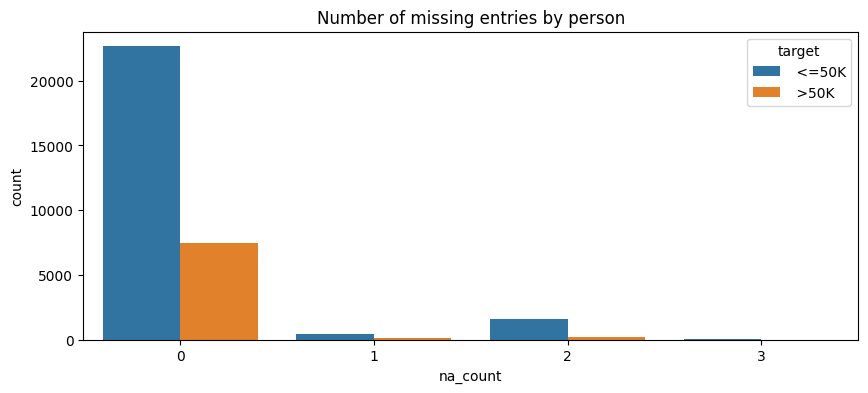

In [4]:
# Countplot of number of missing values by person (coded completely by myself, not copied from anywhere)
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='na_count', hue='target')
plt.title('Number of missing entries by person')
data.drop('na_count', axis=1, inplace=True)

In [5]:
# Dropping nan values as they are a small fraction of the data and I'm lazy
data = data.dropna()
test = test.dropna()

In [6]:
# Checking the balance of the data
data.target.value_counts()

target
 <=50K    22654
 >50K      7508
Name: count, dtype: int64

In [7]:
# Checking the number of unique values in each column
data.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
educationnum         16
marritalstatus        7
occupation           14
relationship          6
race                  5
sex                   2
gain                118
loss                 90
hpw                  94
country              41
target                2
dtype: int64

In [8]:
# fnlwgt plot
# sns.histplot(data, x = 'fnlwgt')
# plt.show()


In [9]:
data.fnlwgt.describe()

count    3.016200e+04
mean     1.897938e+05
std      1.056530e+05
min      1.376900e+04
25%      1.176272e+05
50%      1.784250e+05
75%      2.376285e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [10]:
# Descretizing fnlwgt column based on quartiles

fnl_bins = [1.2e+04, 1.2e+05, 1.8e+05, 2.4e+05, 1.5e+06]
fnl_labels = ['fnl-0-25', 'fnl-25-50', 'fnl-50-75', 'fnl-75-100']

data['fnl'] = pd.cut(data['fnlwgt'], bins=fnl_bins, labels=fnl_labels)
test['fnl'] = pd.cut(test['fnlwgt'], bins=fnl_bins, labels=fnl_labels)

data.drop('fnlwgt', axis = 1, inplace = True)
test.drop('fnlwgt', axis = 1, inplace = True)

In [11]:
# Descretizing Age column

age_bins = [17, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['Age-17-29', 'Age-30-39', 'Age-40-49', 'Age-50-59', 'Age-60-69', 'Age-70-79', 'Age-80-90']

data['agerange'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
test['agerange'] = pd.cut(test['age'], bins=age_bins, labels=age_labels)

data.drop('age', axis = 1, inplace = True)
test.drop('age', axis = 1, inplace = True)


In [12]:
# Dropping education column as it is the exact same as educationnum. educationnum is the ordinal version of it
data.drop('education', axis = 1, inplace = True)
test.drop('education', axis = 1, inplace = True)

In [13]:
# One hot encoding some categorical columns
cols = ['workclass', 'marritalstatus', 'occupation', 'race', 'relationship', 'agerange', 'fnl']

for col1 in cols:
    dummies = pd.get_dummies(data[col1], dtype=int)
    data = pd.concat([data, dummies], axis=1)

for col2 in cols:
    dummies = pd.get_dummies(test[col2], dtype=int)
    test = pd.concat([test, dummies], axis=1)
data.drop(data[cols], axis=1, inplace=True)
test.drop(test[cols], axis=1, inplace=True)

In [14]:
# Label encoding some categorical columns
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
test['target'] = le.fit_transform(test['target'])
data['sex'] = le.fit_transform(data['sex'])
test['sex'] = le.fit_transform(test['sex'])

In [15]:
# Frequency encoding the country column. using the same encoding in train for test to avoid data leakage.
frequency_map = data['country'].value_counts().to_dict()
data['countryfreq'] = data['country'].map(frequency_map)
test['countryfreq'] = test['country'].map(frequency_map)
data.drop('country', axis = 1, inplace = True)

In [16]:
X_train, y_train = data.drop('target', axis=1), data['target']
X_test, y_test = data.drop('target', axis=1), data['target']

In [17]:
# Choosing training model
model = RandomForestClassifier(class_weight='balanced') # Setting class_weight to balanced because the data is imbalanced
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the classifier using different metrics for both training and test data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

# Print the evaluation metrics for both training and test data
print("Training Accuracy: {:.2f}%".format(accuracy_train * 100))
print("Training Precision: {:.2f}%".format(precision_train * 100))
print("Training Recall: {:.2f}%".format(recall_train * 100))
print("Training F1 Score: {:.2f}".format(f1_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test * 100))
print("Test Precision: {:.2f}%".format(precision_test * 100))
print("Test Recall: {:.2f}%".format(recall_test * 100))
print("Test F1 Score: {:.2f}".format(f1_test))

Training Accuracy: 95.79%
Training Precision: 87.60%
Training Recall: 96.79%
Training F1 Score: 0.92
Test Accuracy: 95.79%
Test Precision: 87.60%
Test Recall: 96.79%
Test F1 Score: 0.92


In [18]:

# Apply random oversampling to balance the dataset (Improves recall)
oversampler = RandomOverSampler(random_state=30)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Choosing training model
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = model.predict(X_train_resampled)
y_pred = model.predict(X_test)

# Evaluate the classifier using different metrics for both training and test data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

# Print the evaluation metrics for both training and test data
print("Training Accuracy: {:.2f}%".format(accuracy_train * 100))
print("Training Precision: {:.2f}%".format(precision_train * 100))
print("Training Recall: {:.2f}%".format(recall_train * 100))
print("Training F1 Score: {:.2f}".format(f1_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test * 100))
print("Test Precision: {:.2f}%".format(precision_test * 100))
print("Test Recall: {:.2f}%".format(recall_test * 100))
print("Test F1 Score: {:.2f}".format(f1_test))





Training Accuracy: 96.51%
Training Precision: 94.72%
Training Recall: 98.52%
Training F1 Score: 0.97
Test Accuracy: 95.35%
Test Precision: 85.51%
Test Recall: 97.88%
Test F1 Score: 0.91
